<a href="https://colab.research.google.com/github/souvikPratihar/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import yfinance as yf
import pandas as pd
import numpy as np

In [58]:
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data = data[['Close']]  # Focus on Close price only
data.dropna(inplace=True)
data.head(10)

/tmp/ipython-input-58-2818292211.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288582
2015-01-05,23.604334
2015-01-06,23.606552
2015-01-07,23.937567
2015-01-08,24.857304
2015-01-09,24.883965
2015-01-12,24.270811
2015-01-13,24.486303


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
# Using previous 30 days to predict next day
X = []
y = []

for i in range(30, len(data_scaled)):
    X.append(data_scaled[i-30:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model = LinearRegression()
model.fit(X_train_flat, y_train)

LinearRegression()

In [63]:
y_pred_scaled = model.predict(X_test_flat)

#Converting back to original scale
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


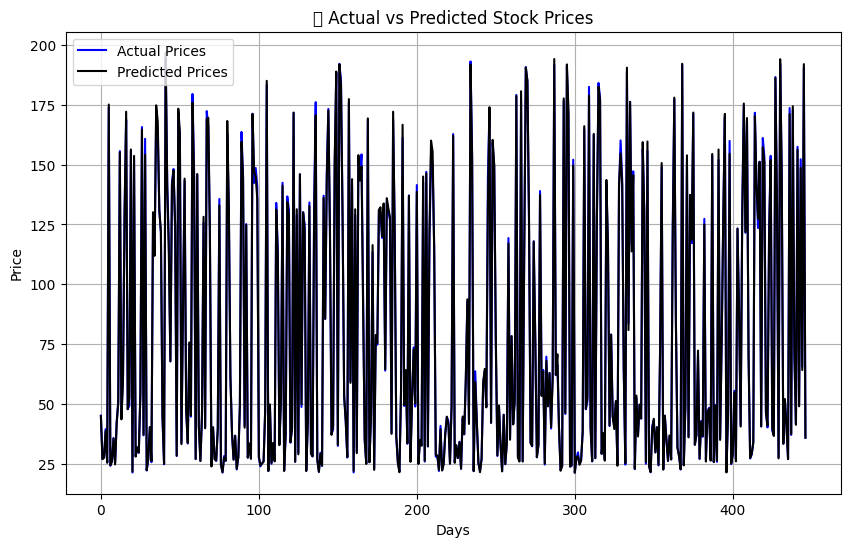

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='black')
plt.title('📈 Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()